# K-Folds Cross Validation

Demonstration of the bias/variance tradeoff, by using supervised algorithm

Bias, in effect, measures how far, in general, the model's predictions are from the correct value.
Bias is a measure to judge the models on the basis of accuracry or just how correct the model is on an average.

Variance is a measure of how much the predictions for a fixed point vary between different end results.
If the model does not change much between samples, the model would be considered a low variance model.
If the model changes drastically between samples, the model would be considered a high variance model.

Underfitting: Models with high bias + low variance. To overcome this issue:
- Use more features
- Try more complicated models

Overfitting: Models with low bias + high variance. To overcome this issue:
- Use fewer features
- Fit on more training samples

To combat overfitting in practice, one should always use cross-validation.

K-Nearest Neighbors (KNN) algorithm is used and it is a supervised learning algorithm that uses a lookalike paradigm, 
which means that it makes predictions based on similar data points seen in the past.

KNN has a complexity input, K, which represents how many similar data points to compare to. 
If K = 3, then, for a given input, look at the nearest three data points and use them for the prediction.

In this case, K represents our model complexity.


In [180]:
# read in the iris data
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
print(knn.score(X, y)) # returns 1 because we are fitting on the real data, and scoring on real target

1.0


In [181]:
# Using a training set and test set is so important
# Just as important is cross validation. Remember cross validation
# is using several different train test splits and
# averaging your results!

## CROSS-VALIDATION
# check CV score for K=1
from sklearn.model_selection import cross_val_score, train_test_split

tree = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
print(scores.mean()) # returns 0.96 because now we have train/test data set, KNN has not seen the test points

0.96


[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


Text(0, 0.5, 'Error')

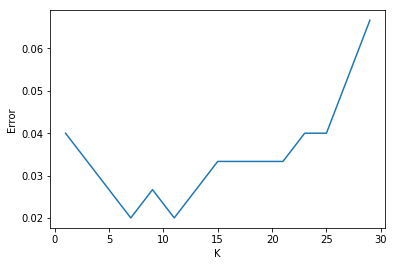

In [184]:
import numpy as np

# check CV score for K=5
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)
print(np.mean(scores))

# search for an optimal value of K
k_range = range(1, 30, 2) # [1, 3, 5, 7, …, 27, 29]
errors = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)                      # instantiate a KNN with k neighbors
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # get our five accuracy scores
    accuracy = np.mean(scores)                                     # average them together
    error = 1 - accuracy                                           # get our error, which is 1 minus the accuracy
    errors.append(error)                                           # keep track of a list of errors

# plot the K values (x-axis) versus the 5-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, errors)
plt.xlabel('K')
plt.ylabel('Error')

Toward the left, the graph has a higher bias and is underfitting.
As the model's complexity increases, the error term began to go down
But after a while, the model became overly complex, and the high variance kicked in, making our error term go back up.

It seems that the optimal value of K is between 6 and 10.


## Grid searching
sklearn also has, up its sleeve, another useful tool called grid searching. A grid
search will by brute force try many different model parameters and give us the best
one based on a metric of our choosing. For example, we can choose to optimize KNN
for accuracy in the following manner:

For each combination of features, i15 different possibilities for K, 
the model is cross-validated each one five time.
This means that by the end of this code, 15 * 5 = 75 different KNN models!


In [238]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()  # instantiate a blank slate KNN, no neighbors
k_range = range(1, 30, 2)
param_grid = dict(n_neighbors=k_range)  # param_grid = {"n_ neighbors": [1, 3, 5, …]}
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 30, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [239]:
# number of KNN models
len(k_range) * 5

75

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


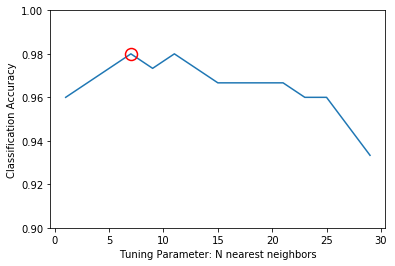

In [218]:
# check the results of the grid search
print(grid.cv_results_.keys())

#grid.cv_results_
grid_mean_test_score = grid.cv_results_['mean_test_score']

# this is a list of the average accuracies for each parameter combination
plt.figure()
plt.ylim([0.9, 1])
plt.xlabel('Tuning Parameter: N nearest neighbors')
plt.ylabel('Classification Accuracy')
plt.plot(k_range, grid_mean_test_score)
plt.plot(grid.best_params_['n_neighbors'], grid.best_score_, 'ro',
         markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

In [226]:
# instead of above graph, to get best params of the model

print(grid.best_params_) # grid.cv_results_['params'][result.best_index_]
print(grid.best_score_)  # grid.cv_results_['mean_test_score'][result.best_index_]
print(grid.cv_results_['std_test_score'][grid.best_index_])

# actually returns the unfit model with the best parameters
print(grid.best_estimator_)

{'n_neighbors': 7}
0.98
0.016329931618554516
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')


"\nKNeighborsClassifier(algorithm='auto', leaf_size=30,\n                     metric='minkowski',\n                     metric_params=None, n_jobs=1, n_neighbors=7, p=2,\n                     weights='uniform')\n"

KNN has other parameters
as well, such as algorithm, p, and weights. A quick look at the scikit-learn
documentation reveals that we have some options for each of these, which are as
follows:
- p is an integer and represents the type of distance we wish to use. By default, we use p=2, which is our standard distance formula.
- Weights is, by default, uniform, but can also be distance, which weighs points by their distance, which means that closer neighbors have a greater impact on the prediction.
- Algorithm is how the model finds the nearest neighbors. We can try ball_ tree, kd_tree, or brute. The default is auto, which tries to use the best one automatically.

In [240]:
knn = KNeighborsClassifier()
k_range = range(1, 30)
algorithm_options = ['kd_tree', 'ball_tree', 'auto', 'brute']
p_range = range(1, 8)
weight_range = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_range, algorithm=algorithm_options, p=p_range)
# trying many more options
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 30), 'weights': ['uniform', 'distance'], 'algorithm': ['kd_tree', 'ball_tree', 'auto', 'brute'], 'p': range(1, 8)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [241]:
# number of KNN models
len(k_range) * len(algorithm_options) * len(p_range) * len(weight_range) * 5

8120

In [242]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'algorithm': 'kd_tree', 'n_neighbors': 6, 'p': 3, 'weights': 'uniform'}
0.9866666666666667
KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=3,
           weights='uniform')


Grid searching is a simple (but inefficient) way of parameter tuning the models to get the best possible outcome.

It should be noted that to get the best possible outcome, feature manipulation (both reduction and engineering) should be used to obtain better results in practice as well. 

It should not merely be up to the model to achieve the best performance.